# B.J. Rauscher's Notes for Implementing the Incomplete Real Fourier Transform in Python

Bernard J. Rauscher<br>
NASA Goddard Space Flight Center

15 April 2021

## 1. Introduction

Simple Improved Reference Subtraction (SIRS) requires an "incomplete Fourier transform" to project the reference columns into Fourier space. Using this, in conjunction with numpy's rfft() function, requires that we really understand what numpy is doing. 

Begin by making some test data and computing the rfft().

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

Make a vector containing random numbers.

In [2]:
# Make some data
n = 128
d = np.random.random(size=n)

Compute it's real Fourier Transform.

In [3]:
ft_d = np.fft.rfft(d)

## 2. What the Numpy Documentation Seems to Say...

According to the numpy documentation (https://numpy.org/doc/stable/reference/routines.fft.html), the inverse discrete Fourier transform implements,

<center>$a_m=\frac{1}{n}\sum_{k=0}^{n-1}A_k\exp\left\{2\pi i\frac{m k}{n}\right\}\hspace{18pt}k=0,\dots,n-1.\hspace{18pt}(1)$</center>

To within the normalization, the basis vectors are of the form,

<center>$\mathbf{B}_k^m=\frac{1}{n}\exp\{2 \pi i \frac{m k}{n} \}.\hspace{18pt}(2)$</center>

The following cells show that this is indeed what is implemented.

In [4]:
# Build the B matrix
B = np.empty((n,n//2+1), dtype=np.complex64)
for m in np.arange(n):
    for k in np.arange(n//2+1):
        B[m,k] = (1/n)*np.exp(2*np.pi*1J*m*k/n)

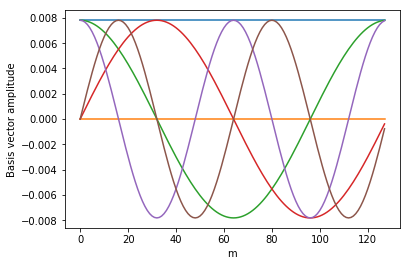

In [5]:
# Plot a few to make sure they look right
plt.close()
for k in np.arange(3):
    plt.plot(np.arange(n), B[:,k].real, '-')
    plt.plot(np.arange(n), B[:,k].imag, '-')
    plt.xlabel('m')
    plt.ylabel('Basis vector amplitude')

Invert B to get an operator that projects the data into Fourier space.

In [6]:
F = np.linalg.pinv(B)

Project our data and compare to what numpy does.

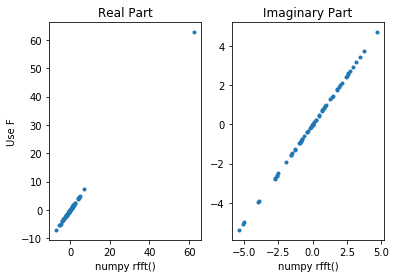

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1,adjustable='box')
ax1.set_xlabel('numpy rfft()')
ax1.set_ylabel('Use F')
ax1.set_title('Real Part')
ax2 = fig.add_subplot(1,2,2,adjustable='box')
ax2.set_xlabel('numpy rfft()')
ax2.set_title('Imaginary Part')
ax1.plot(ft_d.real, np.matmul(F,d).real, '.')
ax2.plot(ft_d.imag, np.matmul(F,d).imag, '.')
plt.show()

And we see that they agree.

## 3. Summary

In summary, numpy's Fourier basis vectors are as shown in Eq. 2. The operator for computing Fourier projection is,

<center>$\mathbf{F}=\mathbf{B}^+.\hspace{18pt}(3)$</center>

Eq. 3 is helpful for computing incomplete Fourier transforms. When the complete Fourier transform is desired, the FFT function will be faster. However, $\mathbf{F}$ is useful in that it can be used to compute incomplete Fourier transforms without interpolating over gaps in the data.